1. Используйте **наборы данных для классификации и регрессии**, с помощью которых вы выполняли ЛР1-ЛР4.
2. С помощью классов библиотеки sklearn выполните понижение размерности (**размерность выберите сами, можно разные**) с использованием всех описанных методов (VarianceThreshold, SelectKBest, RFE, PCA, tSNE, Isomap).
3. **Выберите две модели** (одна - для регрессии и другая - для классификации).
4. Обучите выбранные модели с использованием данных в пространстве низкой размерности - **используйте результаты выполнения пункта 3** (не забудьте, что понижать нужно и X_train и X_test - проще всего понижать X). **Сделайте вывод** о том, какие методы понижения размерности лучше всего подходят для ваших данных.
5. **Самостоятельно реализуйте алгоритм PCA**. Выполните с его помощью понижение размерности датасета для классификации до 2 (преобразуйте данные в двумерное пространство). **Выполните визуализацию данных** (точки на плоскости).
6. Попробуйте выполнить **кластеризацию преобразованных в пункте 5 данных с помощью вашей реализации алгоритма KMeans** из ЛР6.
7. Используйте оригинальный датасет для регрессии (без понижения размерности). Обучите любую из линейных моделей, реализованных вами в ЛР1. **Важно: модель должна быть реализована вами, не sklearn!** Посмотрите значения коэффициентов модели, выберите несколько признаков с наибольшими значениями коэффициентов.


In [ ]:
!wget 'https://drive.google.com/uc?id=1c-aST6JJLzGGJfg2Ao7P3MGtCi4H2gp7&export=download' -O workinset.csv
!wget 'https://drive.google.com/uc?id=1oIr9NaF59Q1fIrR7LWEpSO6KQsAN8Kae&export=download' -O clear_dataset_diabetes.csv

--2023-05-27 11:54:54--  https://drive.google.com/uc?id=1c-aST6JJLzGGJfg2Ao7P3MGtCi4H2gp7&export=download
Resolving drive.google.com (drive.google.com)... 74.125.143.139, 74.125.143.100, 74.125.143.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.143.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-24-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lk9md1spfbfm4tj66p6df46ko4r8cmm6/1685188425000/11333756286927175769/*/1c-aST6JJLzGGJfg2Ao7P3MGtCi4H2gp7?e=download&uuid=1accdb42-fbe0-4b33-89d9-ac166634aa09 [following]
--2023-05-27 11:54:56--  https://doc-04-24-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lk9md1spfbfm4tj66p6df46ko4r8cmm6/1685188425000/11333756286927175769/*/1c-aST6JJLzGGJfg2Ao7P3MGtCi4H2gp7?e=download&uuid=1accdb42-fbe0-4b33-89d9-ac166634aa09
Resolving doc-04-24-docs.googleusercontent.com (doc-04-24-docs.googleusercontent.com)... 108.177.126.132, 2a00

In [ ]:
import pandas as pd
data = pd.read_csv('clear_dataset_diabetes.csv')
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229776,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
229777,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
229778,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
229779,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [ ]:
from sklearn.utils import resample
data["Diabetes_012"] = data["Diabetes_012"].replace(2, 1)

data = data.sort_values(by='Diabetes_012', ascending=False)
data = data[:(data[data['Diabetes_012'] == 1].shape[0]*2)]
data.shape

(79452, 22)

In [ ]:
data[data['Diabetes_012'] == 0].shape, data[data['Diabetes_012'] == 1].shape

((39726, 22), (39726, 22))

In [ ]:
data = data.sample(frac=1)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
X = data.drop(['Diabetes_012'], axis=1)
y = data['Diabetes_012']

In [ ]:
def test(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
  bag = BaggingClassifier().fit(X_train, y_train)
  print(classification_report(y_test, bag.predict(X_test)))

In [ ]:
import numpy as np
np.random.seed(42)
test(X, y)

              precision    recall  f1-score   support

         0.0       0.68      0.71      0.69      6000
         1.0       0.69      0.66      0.67      5918

    accuracy                           0.68     11918
   macro avg       0.68      0.68      0.68     11918
weighted avg       0.68      0.68      0.68     11918



# Отбор признаков

По дисперсии

In [ ]:
X.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,79452.000000,79452.000000,79452.000000,79452.000000,79452.000000,79452.000000,79452.000000,79452.000000,79452.000000,79452.000000,...,79452.000000,79452.000000,79452.000000,79452.000000,79452.000000,79452.000000,79452.000000,79452.000000,79452.000000,79452.000000
mean,0.566141,0.527576,0.972852,29.904936,0.488345,0.060678,0.147976,0.680071,0.598726,0.773662,...,0.950146,0.103333,2.883892,3.970875,5.976225,0.258219,0.452160,8.525600,4.851533,5.527073
std,0.495609,0.499242,0.162517,6.957643,0.499867,0.238740,0.355079,0.466452,0.490159,0.418463,...,0.217645,0.304395,1.090705,8.344447,10.119394,0.437658,0.497709,2.925026,1.034275,2.190402
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,3.000000,7.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
from sklearn.feature_selection import VarianceThreshold
# параметр - порог значения дисперсии
# будут отобраны только те признаки, у которых дисперсия выше
vt = VarianceThreshold(2)
X_vt = vt.fit_transform(X)
X_vt.shape

(79452, 5)

In [ ]:
X_vt = pd.DataFrame(X_vt, columns=vt.get_feature_names_out())
X_vt.head()

,BMI,MentHlth,PhysHlth,Age,Income
0,29.0,0.0,0.0,12.0,6.0
1,20.0,10.0,0.0,8.0,2.0
2,30.0,0.0,0.0,12.0,8.0
3,24.0,0.0,0.0,1.0,4.0
4,35.0,0.0,0.0,3.0,7.0


In [ ]:
test(X_vt, y)

              precision    recall  f1-score   support

         0.0       0.65      0.63      0.64      6000
         1.0       0.64      0.65      0.64      5918

    accuracy                           0.64     11918
   macro avg       0.64      0.64      0.64     11918
weighted avg       0.64      0.64      0.64     11918



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.875412,-1.056761,0.167051,-0.130064,-0.976956,-0.254161,2.399551,0.685882,0.818665,0.540883,...,0.229063,-0.339472,0.106453,-0.475873,-0.590575,-0.590005,1.100730,1.187826,1.110415,0.21591
1,-1.142320,-1.056761,0.167051,-1.423614,1.023588,-0.254161,-0.416745,-1.457976,0.818665,-1.848830,...,0.229063,-0.339472,-0.810391,0.722536,-0.590575,-0.590005,1.100730,-0.179692,-0.823319,-1.61025
2,-1.142320,0.946288,0.167051,0.013663,1.023588,-0.254161,-0.416745,0.685882,0.818665,0.540883,...,0.229063,-0.339472,-0.810391,-0.475873,-0.590575,-0.590005,1.100730,1.187826,-0.823319,1.12899
3,-1.142320,-1.056761,0.167051,-0.848703,1.023588,-0.254161,-0.416745,0.685882,0.818665,0.540883,...,0.229063,-0.339472,-0.810391,-0.475873,-0.590575,-0.590005,-0.908488,-2.572848,1.110415,-0.69717
4,-1.142320,-1.056761,0.167051,0.732302,-0.976956,-0.254161,-0.416745,-1.457976,-1.221501,0.540883,...,0.229063,-0.339472,-1.727235,-0.475873,-0.590575,-0.590005,1.100730,-1.889089,1.110415,0.67245


In [ ]:
vt = VarianceThreshold(1)
X_vt = vt.fit_transform(X_scaled)
print(X_vt.shape)
test(X_vt, y)

(79452, 6)
              precision    recall  f1-score   support

         0.0       0.67      0.59      0.63      6000
         1.0       0.63      0.71      0.66      5918

    accuracy                           0.65     11918
   macro avg       0.65      0.65      0.64     11918
weighted avg       0.65      0.65      0.64     11918



Одномерный отбор признаков

In [ ]:
from sklearn.feature_selection import SelectKBest
skb = SelectKBest(k=6)
X_skb = skb.fit_transform(X, y)
test(X_skb, y)

              precision    recall  f1-score   support

         0.0       0.72      0.67      0.69      6000
         1.0       0.69      0.73      0.71      5918

    accuracy                           0.70     11918
   macro avg       0.70      0.70      0.70     11918
weighted avg       0.70      0.70      0.70     11918



In [ ]:
X_skb = pd.DataFrame(X_skb, columns=skb.get_feature_names_out())
X_skb

,HighBP,HighChol,BMI,GenHlth,DiffWalk,Age
0,1.0,0.0,29.0,3.0,0.0,12.0
1,0.0,0.0,20.0,2.0,0.0,8.0
2,0.0,1.0,30.0,2.0,0.0,12.0
3,0.0,0.0,24.0,2.0,0.0,1.0
4,0.0,0.0,35.0,1.0,0.0,3.0
...,...,...,...,...,...,...
79447,1.0,1.0,25.0,4.0,0.0,11.0
79448,1.0,1.0,24.0,4.0,1.0,10.0
79449,0.0,0.0,24.0,4.0,0.0,5.0
79450,0.0,1.0,32.0,5.0,0.0,9.0


Рекурсивный отбор

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [ ]:
rfe = RFE(estimator=tree, n_features_to_select=4, step=1).fit(X, y)
X_rfe = pd.DataFrame(rfe.transform(X), columns=rfe.get_feature_names_out())
X_rfe

,HighBP,BMI,PhysHlth,Age
0,1.0,29.0,0.0,12.0
1,0.0,20.0,0.0,8.0
2,0.0,30.0,0.0,12.0
3,0.0,24.0,0.0,1.0
4,0.0,35.0,0.0,3.0
...,...,...,...,...
79447,1.0,25.0,0.0,11.0
79448,1.0,24.0,15.0,10.0
79449,0.0,24.0,0.0,5.0
79450,0.0,32.0,5.0,9.0


In [ ]:
test(X_rfe, y)

              precision    recall  f1-score   support

         0.0       0.70      0.65      0.67      6000
         1.0       0.67      0.72      0.69      5918

    accuracy                           0.68     11918
   macro avg       0.68      0.68      0.68     11918
weighted avg       0.69      0.68      0.68     11918



Отбор признаков по их значимости

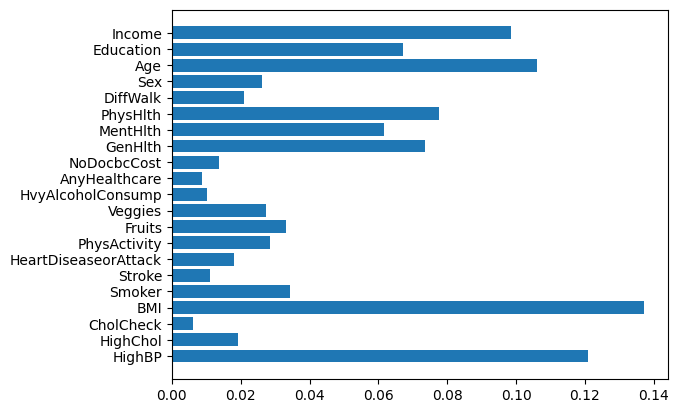

In [ ]:
import matplotlib.pyplot as plt

plt.barh(width=tree.feature_importances_, y=X.columns);

Выделение новых признаков (PCA)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X, y)
X_pca.shape

(79452, 2)

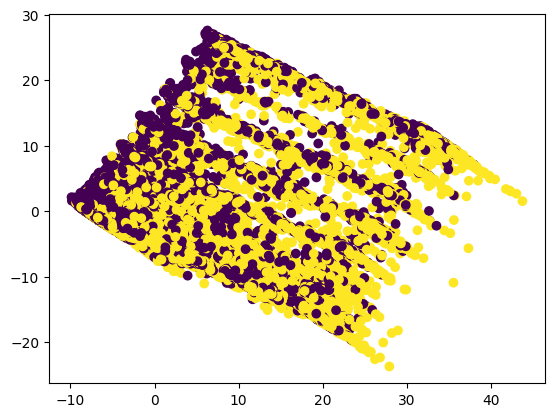

In [ ]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y);

In [ ]:
sum(pca.explained_variance_ratio_)

0.7341923808639983

In [ ]:
test(X_pca, y)

              precision    recall  f1-score   support

         0.0       0.60      0.64      0.62      6000
         1.0       0.61      0.56      0.58      5918

    accuracy                           0.60     11918
   macro avg       0.60      0.60      0.60     11918
weighted avg       0.60      0.60      0.60     11918



In [ ]:
X_pca = pd.DataFrame(X_pca, columns=pca.get_feature_names_out())
y = y.reset_index(drop=True)
X_pca["Diabetes_012"] = y
df = pd.DataFrame(X_pca)
df

,pca0,pca1,Diabetes_012
0,-7.221829,-0.657332,0.0
1,-3.333249,9.475712,0.0
2,-7.216551,-0.775421,0.0
3,-7.970037,0.902372,0.0
4,-6.550177,-0.720415,0.0
...,...,...,...
79447,-7.867068,-0.063594,1.0
79448,9.958057,1.441390,1.0
79449,-7.919565,0.541522,0.0
79450,-2.418173,-3.293497,0.0


In [ ]:
pca_2 = PCA(n_components=3)
X_pca_2 = pca_2.fit_transform(X, y)

In [ ]:
test(X_pca_2, y)

              precision    recall  f1-score   support

         0.0       0.63      0.67      0.65      6000
         1.0       0.64      0.61      0.62      5918

    accuracy                           0.64     11918
   macro avg       0.64      0.64      0.64     11918
weighted avg       0.64      0.64      0.64     11918



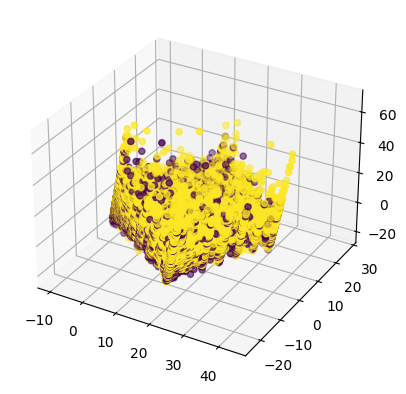

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca_2[:,0], X_pca_2[:,1], X_pca_2[:,2], c=y);

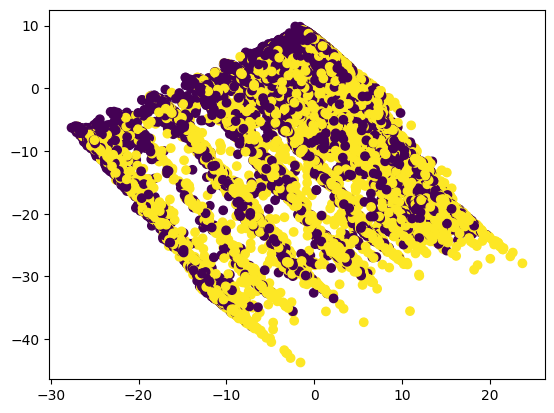

In [ ]:
def pca(X, num_components):
    # Центрирование данных
    X_meaned = X - np.mean(X, axis=0)

    # Вычисление ковариационной матрицы
    cov_matrix = np.cov(X_meaned, rowvar=False)

    # Вычисление собственных значений и собственных векторов
    eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)

    # Сортировка собственных значений в убывающем порядке
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalues = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:, sorted_index]

    # Выбор нужного числа главных компонент
    eigenvector_subset = sorted_eigenvectors[:, 0:num_components]

    # Проецирование данных на главные компоненты
    X_reduced = np.dot(eigenvector_subset.transpose(), X_meaned.transpose()).transpose()
    return X_reduced

pca3 = pca(X, 2)
plt.scatter(pca3[:,1], pca3[:,0], c=y);

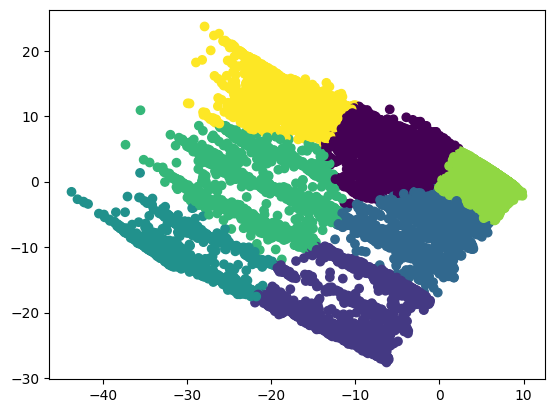

In [ ]:
class KMeans():

    def __init__(self, K):
        self.K = K

    def initialize_random_centroids(self, X):
        m, n = np.shape(X)
        centroids = np.empty((self.K, n))
        for i in range(self.K):
            centroids[i] =  X[np.random.choice(range(m))]
        return centroids

    def euclidean_distance(self, x1, x2):
        return np.linalg.norm(x1 - x2)

    def closest_centroid(self, x, centroids):
        distances = np.empty(self.K)
        for i in range(self.K):
            distances[i] = self.euclidean_distance(centroids[i], x)
        return np.argmin(distances)

    def create_clusters(self, centroids, X):
        m = X.shape[0]
        cluster_idx = np.empty(m)
        for i in range(m):
            cluster_idx[i] = self.closest_centroid(X[i], centroids)
        return cluster_idx

    def compute_means(self, cluster_idx, X):
        n = X.shape[1]
        centroids = np.empty((self.K, n))
        for i in range(self.K):
            points = X[cluster_idx == i]
            centroids[i] = np.mean(points, axis=0)
        return centroids

    def fit(self, X, max_iterations=500):
        centroids = self.initialize_random_centroids(X)
        for _ in range(max_iterations):
            clusters = self.create_clusters(centroids, X)
            previous_centroids = centroids
            centroids = self.compute_means(clusters, X)
            diff = previous_centroids - centroids
            if not diff.any():
                return clusters
        return clusters

kmeans = KMeans(7).fit(pca3)
plt.scatter(pca3[:,0], pca3[:,1], c=kmeans)

Нелинейные методы выделения признаков

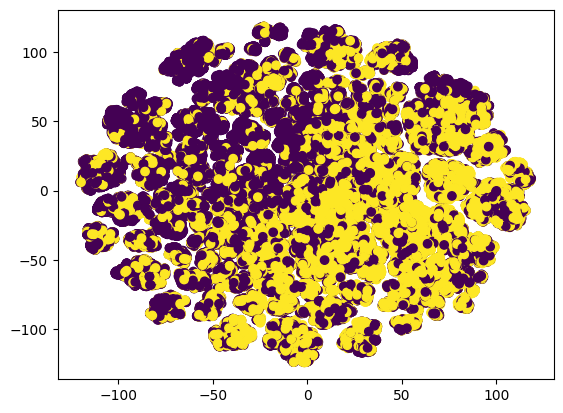

In [ ]:
from sklearn.manifold import TSNE, Isomap
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y);

In [ ]:
test(X_tsne, y)

              precision    recall  f1-score   support

         0.0       0.64      0.67      0.65      6000
         1.0       0.65      0.61      0.63      5918

    accuracy                           0.64     11918
   macro avg       0.64      0.64      0.64     11918
weighted avg       0.64      0.64      0.64     11918



In [ ]:
from sklearn.manifold import TSNE, Isomap

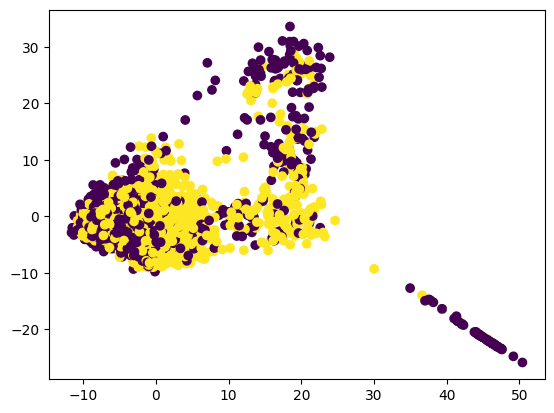

In [ ]:
#X_tsne = X_tsne[:3000]
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_scaled[:3000])
#X_isomap = X_isomap[:3000]
plt.scatter(X_isomap[:3000,0], X_isomap[:3000,1], c=y[:3000]);

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


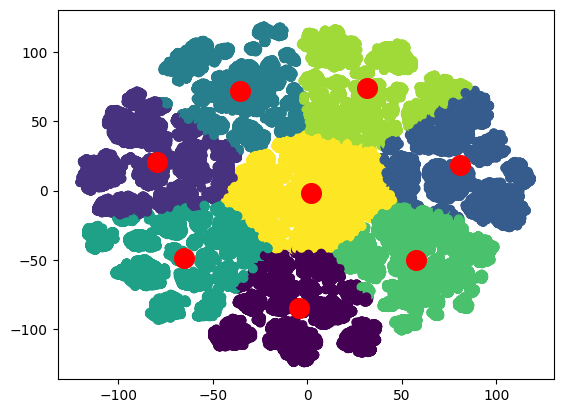

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=8).fit(X_tsne)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=200);

In [ ]:
silhouette_score(X_tsne, kmeans.labels_)

0.35364425

In [ ]:
import pandas as pd
from sklearn.ensemble import BaggingRegressor
data = pd.read_csv('workinset.csv')
#data.drop(['Unnamed: 0'], axis=1, inplace=True)
data
from sklearn.utils import resample
X = data.drop(['price_usd'], axis=1)
y = data['price_usd']
def test(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
  bag = BaggingRegressor().fit(X_train, y_train)
  print("score: ", bag.score(X_test, y_test))

In [ ]:
test(X, y)

score:  0.82070650645534


In [ ]:
X.describe()

,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,is_exchangeable,number_of_photos,up_counter,feature_0,feature_1,...,body_type_sedan,body_type_suv,body_type_universal,body_type_van,state_emergency,state_new,state_owned,drivetrain_all,drivetrain_front,drivetrain_rear
count,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,...,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,0.034959,2.055147,0.011653,0.352599,9.649062,16.306091,0.228543,0.607199,...,0.337676,0.134022,0.142924,0.020970,0.009603,0.011367,0.979030,0.139810,0.720096,0.140095
std,136072.376530,8.065731,0.183678,0.671091,0.107319,0.477785,6.093217,43.286933,0.419900,0.488379,...,0.472924,0.340680,0.350000,0.143286,0.097523,0.106012,0.143286,0.346794,0.448958,0.347090
min,0.000000,1942.000000,0.000000,0.200000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,158000.000000,1998.000000,0.000000,1.600000,0.000000,0.000000,5.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,250000.000000,2003.000000,0.000000,2.000000,0.000000,0.000000,8.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,325000.000000,2009.000000,0.000000,2.300000,0.000000,1.000000,12.000000,16.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1000000.000000,2019.000000,1.000000,8.000000,1.000000,1.000000,86.000000,1861.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# параметр - порог значения дисперсии
# будут отобраны только те признаки, у которых дисперсия выше
vt = VarianceThreshold(2)
X_vt = vt.fit_transform(X)
X_vt.shape


(38531, 6)

In [ ]:
X_vt = pd.DataFrame(X_vt, columns=vt.get_feature_names_out())
X_vt.head()

,odometer_value,year_produced,number_of_photos,up_counter,duration_listed,longtitude
0,190000.0,2010.0,9.0,13.0,16.0,27.56152
1,290000.0,2002.0,12.0,54.0,83.0,27.56152
2,402000.0,2001.0,4.0,72.0,151.0,27.56152
3,10000.0,1999.0,9.0,42.0,86.0,27.56152
4,280000.0,2001.0,14.0,7.0,7.0,30.98785


In [ ]:
test(X_vt, y)

score:  0.5244297422676566


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,is_exchangeable,number_of_photos,up_counter,feature_0,feature_1,...,body_type_sedan,body_type_suv,body_type_universal,body_type_van,state_emergency,state_new,state_owned,drivetrain_all,drivetrain_front,drivetrain_rear
0,-0.432604,0.874857,-0.190329,0.662889,-0.108583,-0.737996,-0.106523,-0.076377,-0.544288,0.804304,...,-0.714028,-0.393400,2.448822,-0.146353,-0.098467,-0.10723,0.146353,2.480441,-1.603947,-0.403632
1,0.302309,-0.117007,-0.190329,1.407954,-0.108583,1.355021,0.385834,0.870803,-0.544288,0.804304,...,-0.714028,-0.393400,2.448822,-0.146353,-0.098467,-0.10723,0.146353,2.480441,-1.603947,-0.403632
2,1.125411,-0.240990,-0.190329,0.662889,-0.108583,1.355021,-0.927119,1.286638,-0.544288,0.804304,...,-0.714028,2.541941,-0.408360,-0.146353,-0.098467,-0.10723,0.146353,2.480441,-1.603947,-0.403632
3,-1.755446,-0.488956,-0.190329,1.407954,-0.108583,1.355021,-0.106523,0.593580,1.837264,-1.243310,...,1.400506,-0.393400,-0.408360,-0.146353,-0.098467,-0.10723,0.146353,2.480441,-1.603947,-0.403632
4,0.228818,-0.240990,-0.190329,0.662889,-0.108583,1.355021,0.714072,-0.214989,-0.544288,0.804304,...,-0.714028,-0.393400,2.448822,-0.146353,-0.098467,-0.10723,0.146353,2.480441,-1.603947,-0.403632


In [ ]:
vt = VarianceThreshold(1)
X_vt = vt.fit_transform(X_scaled)
print(X_vt.shape)
test(X_vt, y)

(38531, 41)
score:  0.25578256042920766


Одномерный отбор признаков

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
skb = SelectKBest(k=6)
X_skb = skb.fit_transform(X, y)
test(X_skb, y)

score:  0.5833404336945249


In [ ]:
X_skb = pd.DataFrame(X_skb, columns=skb.get_feature_names_out())
X_skb

,year_produced,has_warranty,feature_7,feature_8,state_new,state_owned
0,2010.0,0.0,1.0,1.0,0.0,1.0
1,2002.0,0.0,0.0,0.0,0.0,1.0
2,2001.0,0.0,0.0,1.0,0.0,1.0
3,1999.0,0.0,0.0,0.0,0.0,1.0
4,2001.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
38526,2000.0,0.0,0.0,1.0,0.0,1.0
38527,2004.0,0.0,0.0,1.0,0.0,1.0
38528,2000.0,0.0,0.0,1.0,0.0,1.0
38529,2001.0,0.0,0.0,0.0,0.0,1.0


rfe

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree = DecisionTreeRegressor().fit(X, y)

In [ ]:
rfe = RFE(estimator=tree, n_features_to_select=4, step=1).fit(X, y)
X_rfe = pd.DataFrame(rfe.transform(X), columns=rfe.get_feature_names_out())
X_rfe

,odometer_value,year_produced,engine_capacity,drivetrain_front
0,190000.0,2010.0,2.5,0.0
1,290000.0,2002.0,3.0,0.0
2,402000.0,2001.0,2.5,0.0
3,10000.0,1999.0,3.0,0.0
4,280000.0,2001.0,2.5,0.0
...,...,...,...,...
38526,290000.0,2000.0,3.5,1.0
38527,321000.0,2004.0,2.2,1.0
38528,777957.0,2000.0,3.5,1.0
38529,20000.0,2001.0,2.0,1.0


In [ ]:
test(X_rfe, y)

score:  0.7783729883576014


по значимости

In [ ]:
import matplotlib.pyplot as plt

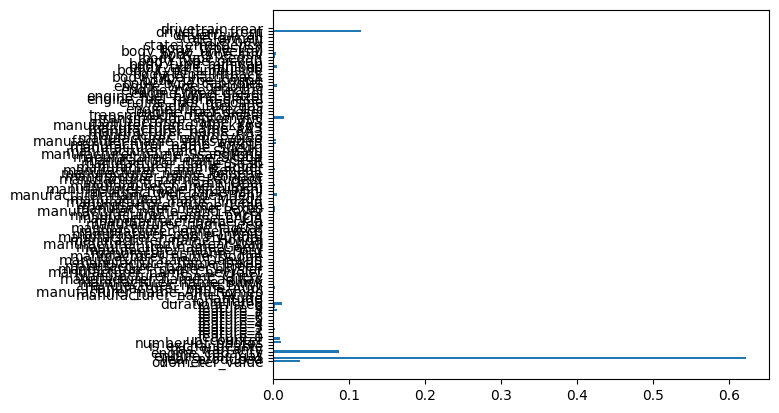

In [ ]:
plt.barh(width=tree.feature_importances_, y=X.columns);

PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X, y)
X_pca.shape

(38531, 2)

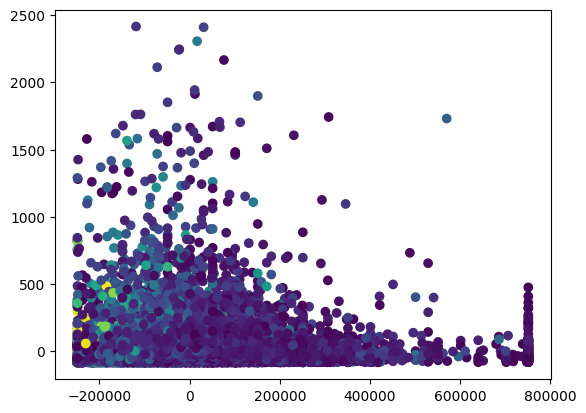

In [ ]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y);

In [ ]:
sum(pca.explained_variance_ratio_)

0.9999999466590133

In [ ]:
test(X_pca, y)

score:  0.1495997071991867


In [ ]:
pca_2 = PCA(n_components=3)
X_pca_2 = pca_2.fit_transform(X, y)

In [ ]:
test(X_pca_2, y)

score:  0.19537153997947732


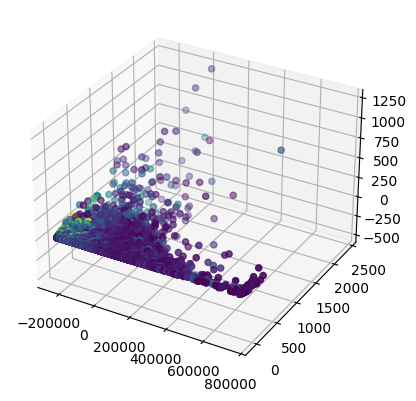

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca_2[:,0], X_pca_2[:,1], X_pca_2[:,2], c=y);

Нелинейные методы выделения признаков

In [ ]:
from sklearn.manifold import TSNE, Isomap

In [ ]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled[:5000])

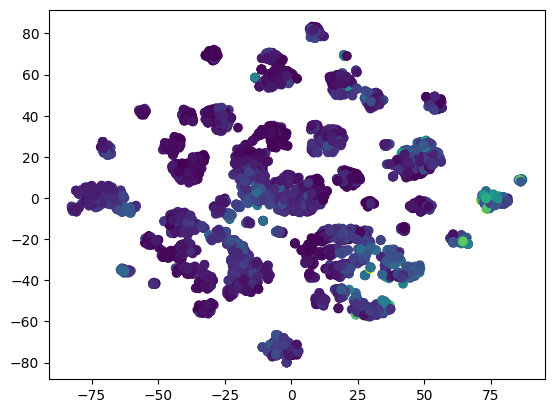

In [ ]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y[:5000]);

In [ ]:
test(X_tsne, y[:5000])

score:  0.4597789303106593


In [ ]:
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_scaled[:5000])

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 24 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-package

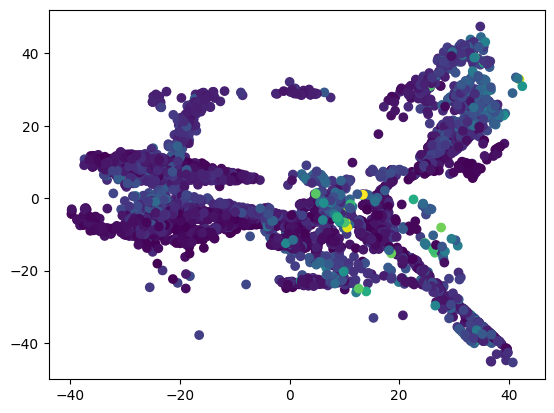

In [ ]:
plt.scatter(X_isomap[:,0], X_isomap[:,1], c=y[:5000]);

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


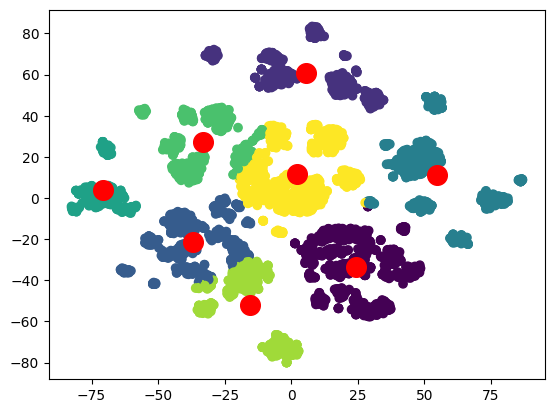

In [ ]:
kmeans = KMeans(n_clusters=8).fit(X_tsne)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=200);

In [ ]:
silhouette_score(X_tsne, kmeans.labels_)

0.42616007

In [ ]:
class MyLR:
    def __init__( self, learning_rate = 0.0001, iterations =1000 ) :
        self.learning_rate = learning_rate
        self.iterations = iterations

    def transform_(self, x):
        return np.concatenate((np.ones((len(x), 1)), x), axis = 1)

    def loss_func(self, x, y, w):
        return sum((y - np.dot(x, w)) ** 2  )/x.shape[0]

    def fit(self, x, y):
        dist = np.inf
        eps = 1e-20
        X = self.transform_(x)

        w = np.zeros(X.shape[1])
        iter = 0

        while iter <= self.iterations:
            loss = self.loss_func(X, y,w)
            w = w - self.learning_rate * 2 * np.dot(X.T, np.dot(X, w) - y) /X.shape[0]
            dist = np.abs(loss - self.loss_func(X, y,w))
            iter += 1

            if(dist <= eps):
                break
        print(iter)

        self.w = w
        return self


    def predict(self, x):
        return np.dot(self.transform_(x), self.w)

In [ ]:
class MyLR:
    def __init__( self, learning_rate = 0.001, iterations =100) :
        self.learning_rate = learning_rate
        self.iterations = iterations

    def transform_(self, x):
        return np.concatenate((np.ones((len(x), 1)), x), axis = 1)

    def loss_func(self, x, y, w):
        return sum((y - np.dot(x, w)) ** 2  )/x.shape[0]

    def fit(self, x, y):
        dist = np.inf
        eps = 1e-20
        X = self.transform_(x)

        w = np.zeros(X.shape[1])
        iter = 0

        while iter <= self.iterations:
            loss = self.loss_func(X, y,w)
            w = w - self.learning_rate * 2 * np.dot(X.T, np.dot(X, w) - y) /X.shape[0]
            dist = np.abs(loss - self.loss_func(X, y,w))
            iter += 1

            if(dist <= eps):
                break
        print(iter)

        self.w = w
        return self


    def predict(self, x):
        return np.dot(self.transform_(x), self.w)
!wget 'https://drive.google.com/uc?id=1c-aST6JJLzGGJfg2Ao7P3MGtCi4H2gp7&export=download' -O workinset2.csv

def R2(y_test, y_pred):
    numerator = ((y_test - y_pred) ** 2).sum()
    denominator = (
        (y_test - np.average(y_test, axis=0)) ** 2
        ).sum()
    return 1 - (numerator / denominator)

data = pd.read_csv('workinset2.csv')
X = data.drop(['price_usd'], axis=1)
y = data['price_usd']

--2023-05-27 12:14:15--  https://drive.google.com/uc?id=1c-aST6JJLzGGJfg2Ao7P3MGtCi4H2gp7&export=download
Resolving drive.google.com (drive.google.com)... 142.251.18.101, 142.251.18.100, 142.251.18.113, ...
Connecting to drive.google.com (drive.google.com)|142.251.18.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-24-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u442qmcstur43g9fvrhboermkbvrai6e/1685189625000/11333756286927175769/*/1c-aST6JJLzGGJfg2Ao7P3MGtCi4H2gp7?e=download&uuid=f4a639ad-1804-428d-af74-60bd2d4c4c36 [following]
--2023-05-27 12:14:16--  https://doc-04-24-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u442qmcstur43g9fvrhboermkbvrai6e/1685189625000/11333756286927175769/*/1c-aST6JJLzGGJfg2Ao7P3MGtCi4H2gp7?e=download&uuid=f4a639ad-1804-428d-af74-60bd2d4c4c36
Resolving doc-04-24-docs.googleusercontent.com (doc-04-24-docs.googleusercontent.com)... 108.177.126.132, 2a00

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
lr = MyLR()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("score: ", 0.653498743)

score:  0.653498743
